**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Defining the path or url**

In [2]:
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"

**Reading the Data**

In [5]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
df.tail()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,19,25,22625.0,12.368421,Medium,0,1


**HEATMAP**

**Multiple Linear Regression And Polynomial Regression**

**Multiple Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
ln = LinearRegression()
ln

LinearRegression()

In [11]:
x = df[[ 'highway-mpg']]
y = df['price']

In [12]:
ln.fit(x,y)

LinearRegression()

**Prediction**

In [13]:
Yhat=ln.predict(x)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

The Intercept

In [14]:
ln.intercept_

38423.3058581574

The coefficient

In [15]:
ln.coef_

array([-821.73337832])

**The Estimated Simple Linear Model**

Price =38423.31 - 821.73*Highway-Mpg


**Multiple Linear Regression**

In [16]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [17]:
ln.fit(Z, df['price'])

LinearRegression()

The Intercept

In [18]:
ln.intercept_

-15806.62462632922

The coefficient

In [19]:
ln.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

**The multiple Regression Model**

Price = -15806.6 + 53.49*horsepower + 4.70*curbweight + 81.53*Enginesize + 36.05*highwaympg

In [20]:
Y_hat=ln.predict(Z)
Y_hat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

**Drawing Graphs**

<ipython-input-21-66a85e3a5a06>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'],hist=False,color="r",label="Actual Value")
<ipython-input-21-66a85e3a5a06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

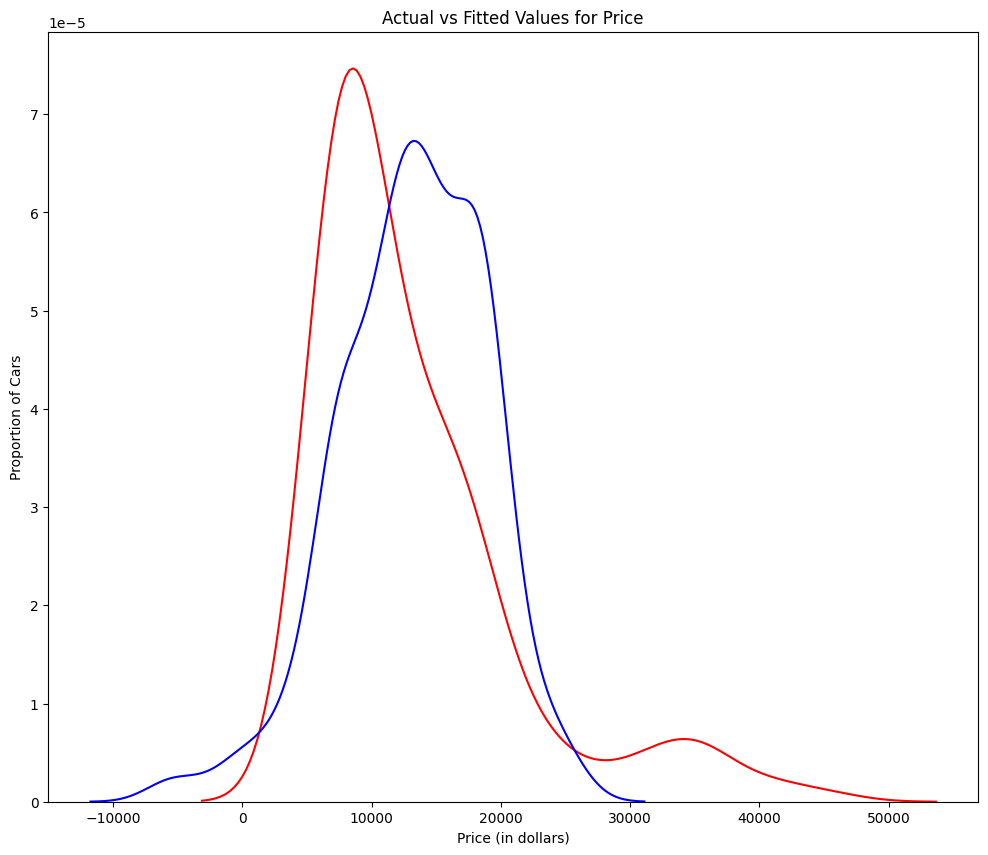

In [21]:
import seaborn as sns
width=12
height=10
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'],hist=False,color="r",label="Actual Value")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**Polynomial Regression**

In [22]:
def plotpolly(model,independent,dependent,name):
  X_new=np.linspace(15,55,100)
  y_new= model(X_new)

  plt.plot(independent,dependent,'.')
  plt.plot(X_new,y_new, '-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
  ax=plt.gca()
  ax.set_facecolor((0.898,0.898,0.898))
  fig=plt.gcf()
  plt.xlabel(name)
  plt.ylabel('Price of Cars')

  plt.show()
  plt.close()


**Polynomial Plot**

(0.0, 48179.57257943084)

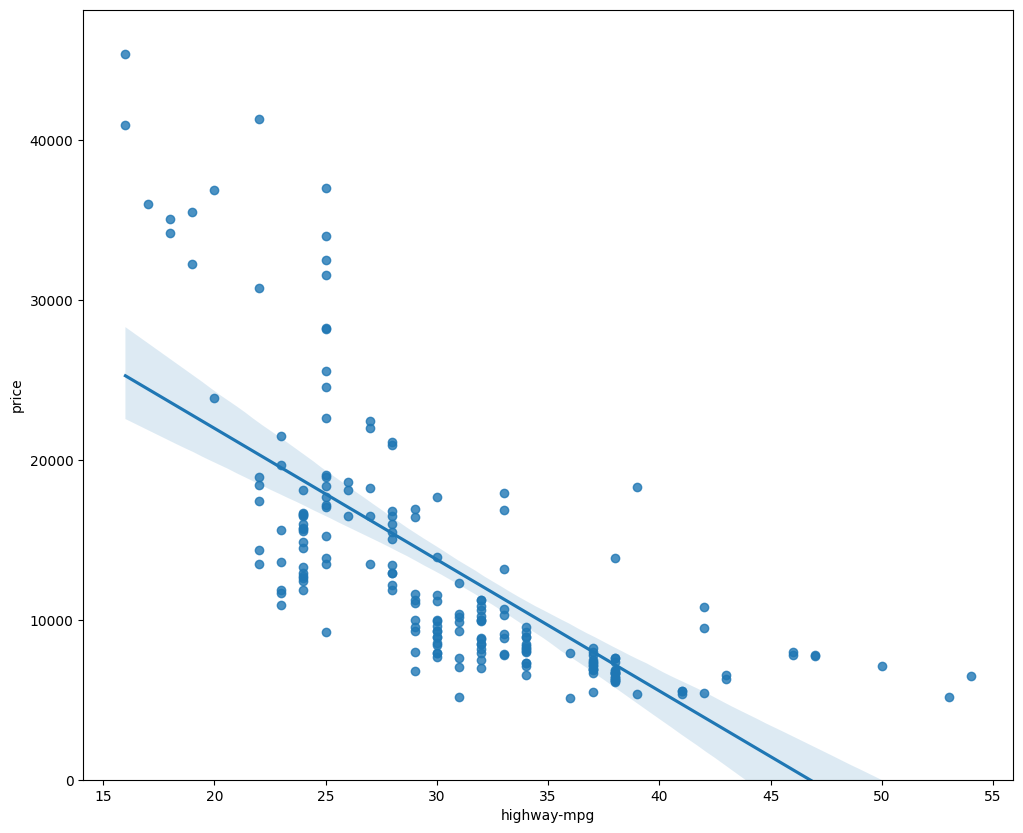

In [23]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [24]:
f= np.polyfit(df['highway-mpg'],df['price'],3)
p= np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


**Plotting the Function**

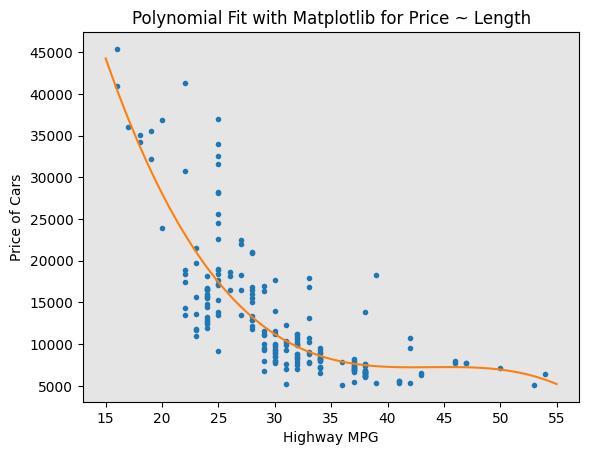

In [25]:
plotpolly (p,x,y,'Highway MPG')

Using Order 11

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


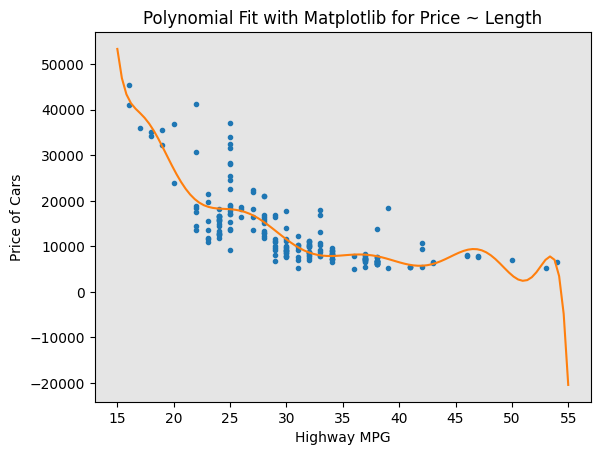

In [39]:
# order 11
f1 = np.polyfit(df['highway-mpg'], df['price'], 11)
p1 = np.poly1d(f1)
print(p1)
plotpolly(p1,x,y,'Highway MPG')

**In sample Evaluation Measure**

**R Squared**

**Mean Square Error**

In [42]:
from sklearn.metrics import mean_squared_error

**For Simple Linear Regression**

R^2

In [43]:
#highway_mpg_fit
ln.fit(x,y)
#find the R^2
print('The R-square is: ', ln.score(x,y))

The R-square is:  0.4965911884339176


**Therefor 49.65% of price variation is explained by simple linear model Horsepower fi**t

In [46]:
Yhat=ln.predict(x)
print('The output of the the first four predicted value is: ', Yhat[0:4])

The output of the the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


**Importing the function Mean squared Error**

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mse=mean_squared_error(df['price'],Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


**Multiple Linear Regression**

**R^2**

In [49]:
#fit the model
ln.fit(Z,df['price'])
#find the R^2
print('The R-square is: ', ln.score(Z,df['price']))

The R-square is:  0.8093562806577457


 **Here 80.93% of price variation is expalined by Multiple linaer regression of the multi fit**

**MSE**

In [50]:
mse=mean_squared_error(df['price'],Y_hat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  11980366.87072649


For polynomial Regression

**R^2**

In [51]:
from sklearn.metrics import r2_score


In [52]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


**We can say that 67.41% of the price variation is explained by the poly_fit**

**Mean Squared Error**

In [53]:
mean_squared_error(df['price'],p(x))

20474146.426361218

**Conclusion**

**Multiple Linear Regression is the best model in this case to predict the price Since its R^2 is high and it has a lower MSE compare to the simple linear and polynomial Regression**